In [27]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/balbi/Downloads/pyMorfologik-master'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pymorfologik import Morfologik
from pymorfologik.parsing import ListParser

import numpy as np
from __future__ import print_function
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
result_df = pd.read_csv('mediaKrytyk-comments-analysis-dictParser.csv')
result_df = result_df.reset_index()
result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']

In [29]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return round(length / 10)

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']
    result_df['score'] = map(get_score, result_df['correct_guess'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['words'])    
    return result_df

In [61]:
def createPlotTextLength(result_df):
    # data to plot
    n_groups = round(result_df['text_length_bin'].max())
    
    grouped = result_df.groupby('text_length_bin', as_index=False).mean()
    sum_elements = grouped.words
    means_words = grouped.words/sum_elements
    means_lemmatisation = grouped.wordsAfterLemmatisation/sum_elements
    means_emotions = grouped.wordsFound/sum_elements

    # create plot
    fig, ax = plt.subplots()
    index = [0., 1., 2., 3., 4., 5., 6., 7.]
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Lenght of text')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, ('10', '20', '30', '40', '50', '60', '70', '80'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [70]:
def createPlotByScore(data):
    grouped = data.groupby('words', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.words
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Lenght of text')
    plt.ylabel('Efficacy')
    
    fig.show()

In [78]:
#zaleznosc oceny od wykrytej emocji
def createPlotByRate(data):
    data = data.round({'rate': 0})   
    grouped = data.groupby('rate', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.rate
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Rate')
    plt.ylabel('Efficacy')

    fig.show()

In [64]:
def createPlotByWordsFound(result):
    grouped = result.groupby('wordsFound', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.wordsFound
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    plt.xlabel('Found words in Slowosiec')
    plt.ylabel('Efficacy')
    
    fig.show()

In [65]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [66]:
def getResults(result_df):
    return result_df.groupby('correct_guess').size()

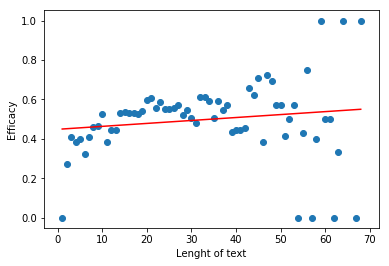

In [71]:
createPlotByScore(result_df)

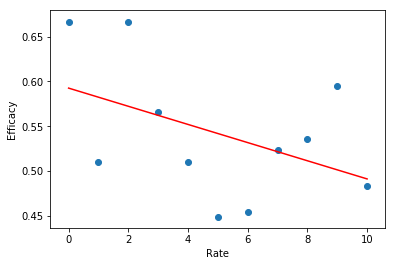

In [79]:
createPlotByRate(result_df)

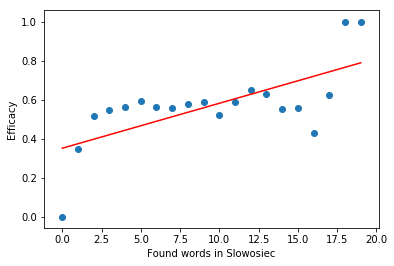

In [73]:
createPlotByWordsFound(result_df)

In [58]:
getResults(result_df)

correct_guess
False    2964
True     3109
dtype: int64

In [48]:
result_df

,index,detectedEmotion,emotion,lemmatisation,rate,resultOfDetecting,text,words,wordsAfterLemmatisation,wordsFound,correct_guess,score,text_length_bin
0,0,positive,positive,"[film, życie, dla, laik, Adam, taki, ja, zrozu...",9.0,0.277778,Adam McKay zrealizował film swojego życia. Naj...,20.0,18.0,6.0,True,1,2.0
1,1,neutral,positive,"[zegarek, chcieć, oczarować, zerkać, tym, się,...",9.0,0.000000,"Ten film tak mnie oczarował, że zapomniałem o ...",33.0,26.0,4.0,False,0,3.0
2,2,neutral,positive,"[skonstruować, pozostawać, wyśmienicie, także,...",9.0,0.000000,"Poza nietypowym wykładem, pozostaje także wyśm...",8.0,7.0,0.0,False,0,1.0
3,3,negative,positive,"[każdy, tym, rozumieć, łatwy, film, finansowy,...",9.0,-0.017857,"Nie jest filmem łatwym, w żadnym wypadku. Jest...",31.0,28.0,6.0,False,0,3.0
4,4,neutral,positive,"[do, pamięć, fragment, on, każdy, moment, mini...",9.0,0.000000,"Czar Big Short nie minie do momentu, aż poznam...",15.0,11.0,1.0,False,0,2.0
5,5,negative,positive,"[wykorzystywać, przedstawiać, oraz, ujęcie, in...",9.0,-0.035714,"Wręcz genialny film, wykorzystujący inne ujęci...",15.0,14.0,5.0,False,0,2.0
6,6,negative,positive,"[tym, który, rozrywkowy, duży, zapewne, ciekaw...",9.0,-0.146667,Niesie duże wartości edukacyjne i przedstawia ...,27.0,25.0,5.0,False,0,3.0
7,7,positive,positive,"[tym, można, przypadek, ekonomia, się, zaowoco...",8.5,0.100000,"Z pewnością nie jest filmem, na który można si...",28.0,25.0,9.0,True,1,3.0
8,8,negative,positive,"[kruchy, film, rynek, i, skorumpować, o]",8.5,-0.166667,Świetny film o kruchym i skorumpowanym rynku.,7.0,6.0,1.0,False,0,1.0
9,9,positive,positive,"[lepsze, świat, prawa, i, który, powstać, życi...",8.5,0.166667,"Filmowa perełka, która gdyby życie i świat był...",13.0,12.0,2.0,True,1,1.0
